## Conditional Agent (Addition or Subtraction)

In [165]:
from typing import TypedDict, List, final
from langgraph.graph import StateGraph, START, END

In [166]:
# Creating schema for the State of the Agent
class AgentState(TypedDict):
    number1: int
    number2: int
    operation1: str
    final_number1: int

    number3: int
    number4: int
    operation2: str
    final_number2: int

In [167]:
def adder_1(state: AgentState) -> AgentState:
    """This node adds the 2 input numbers"""
    state['final_number1'] = state['number1'] + state['number2']
    return state

def subtractor_1(state: AgentState) -> AgentState:
    """This node subtracts the 2 input numbers"""
    if state['number1'] < state['number2']:
        state['final_number1'] = state['number2'] - state['number1']
    else:
        state['final_number1'] = state['number1'] - state['number2']
    return state

def decide_node_1(state: AgentState) -> AgentState:
    """This node decides whether to add or subtract the 2 input numbers"""
    if state['operation1'] == '+':
        return "addition_operation"
    elif state['operation1'] == '-':
        return "subtraction_operation"
    else:
        return state

In [168]:
def adder_2(state: AgentState) -> AgentState:
    """This node adds the 2 input numbers"""
    state['final_number2'] = state['number3'] + state['number4']
    return state

def subtractor_2(state: AgentState) -> AgentState:
    """This node subtracts the 2 input numbers"""
    if state['number3'] < state['number4']:
        state['final_number2'] = state['number4'] - state['number3']
    else:
        state['final_number2'] = state['number3'] - state['number4']
    return state

def decide_node_2(state: AgentState) -> AgentState:
    """This node decides whether to add or subtract the 2 input numbers"""
    if state['operation2'] == '+':
        return "addition_operation"
    elif state['operation2'] == '-':
        return "subtraction_operation"
    else:
        return state

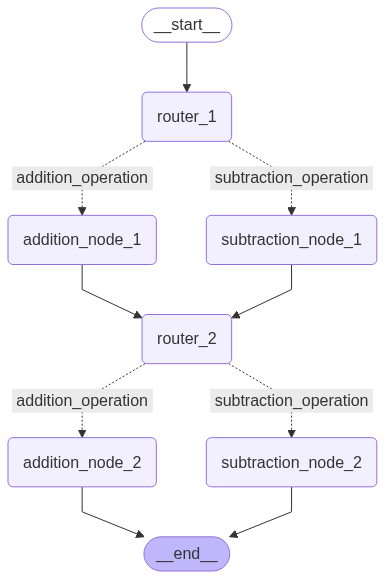

In [169]:
graph = StateGraph(AgentState)

graph.add_node("addition_node_1", adder_1)
graph.add_node("subtraction_node_1", subtractor_1)
graph.add_node("router_1", lambda state: state) # Pass-through function

graph.add_edge(START, "router_1")
graph.add_conditional_edges(
    "router_1",
    decide_node_1,
    {
        # Format {Edge: Node}
        "addition_operation": "addition_node_1",
        "subtraction_operation": "subtraction_node_1",
    }
)

graph.add_node("addition_node_2", adder_2)
graph.add_node("subtraction_node_2", subtractor_2)
graph.add_node("router_2", lambda state: state)

graph.add_edge("addition_node_1", "router_2")
graph.add_edge("subtraction_node_1", "router_2")

graph.add_conditional_edges(
    "router_2",
    decide_node_2,
    {
        "addition_operation": "addition_node_2",
        "subtraction_operation": "subtraction_node_2",
    }
)

graph.add_edge("addition_node_2", END)
graph.add_edge("subtraction_node_2", END)

app = graph.compile()
app

In [170]:
initial_state = AgentState(number1=22, operation1='+', number2=31, operation2='-', number3=34, number4=25)

result = app.invoke(initial_state)

print(result)

{'number1': 22, 'number2': 31, 'operation1': '+', 'final_number1': 53, 'number3': 34, 'number4': 25, 'operation2': '-', 'final_number2': 9}
